In [3]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory


In [4]:
survey_length = 2.2  # days
# Define what we want the final visit ratio map to look like
target_maps = fs.standard_goals()

filters = ['r', 'i']
weights = {}
weights['r'] = [1., 1., 1., 1]
weights['i'] = [1.5, 1., 0., 1]
surveys = []
for filtername in filters:
    bfs = []
    bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(target_map=target_maps[filtername], 
                                           filtername=filtername))
    bfs.append(fs.Filter_change_basis_function(filtername=filtername))
    bfs.append(fs.Visit_repeat_basis_function(filtername='ri'))
    weight = weights[filtername]
    surveys.append(fs.Simple_greedy_survey_fields(bfs, weight, filtername=filtername))

scheduler = fs.Core_scheduler(surveys)

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler, survey_length=survey_length)


/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/surveys.py:284: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  reward_fields[np.where(reward_fields.mask == True)] = -np.inf


progress = 99.0%Completed 893 observations


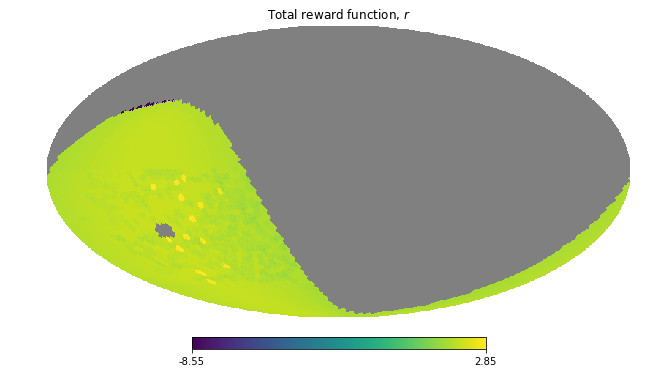

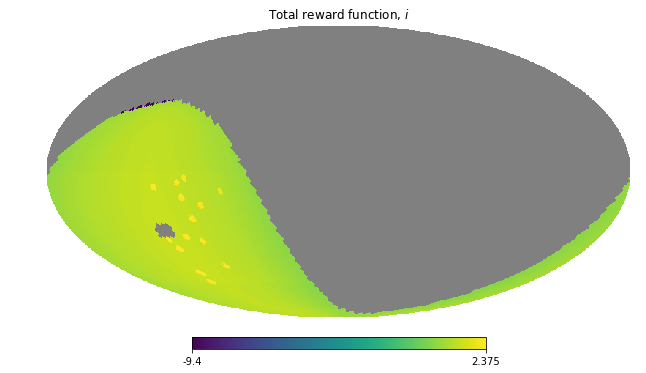

In [5]:
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.calc_reward_function(), title=r'Total reward function, $%s$' % fn)

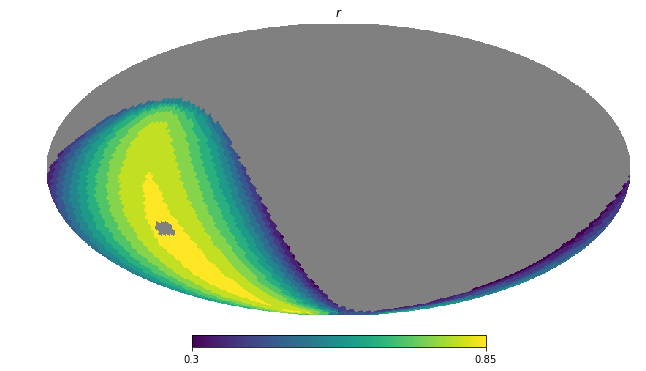

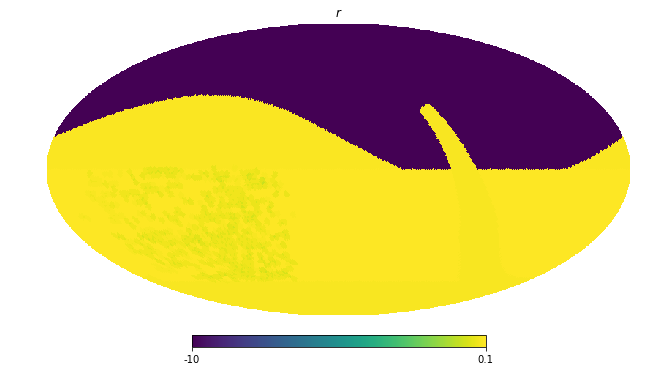

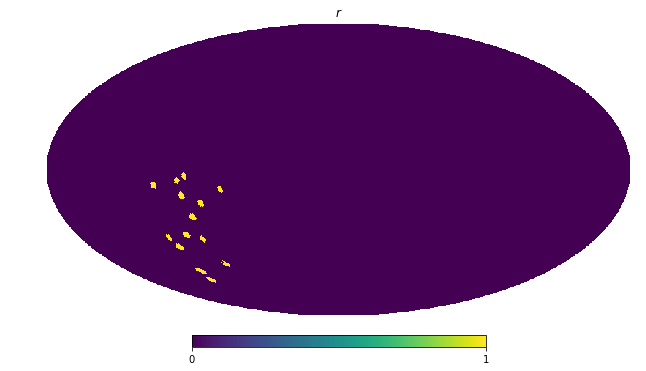

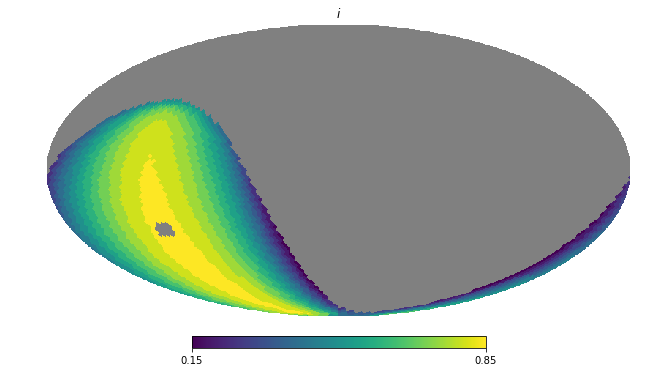

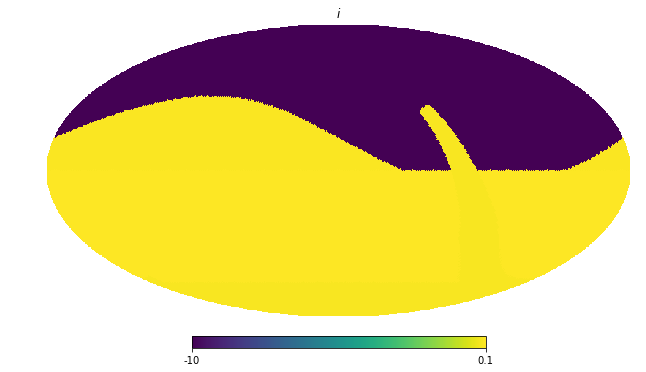

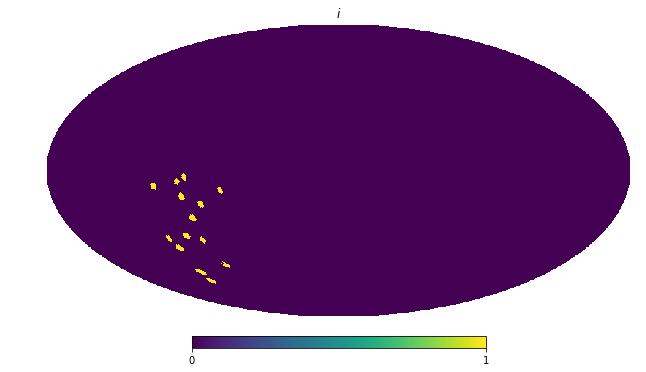

In [6]:
for fn, survey in zip(filters, scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, title='$%s$' % fn)

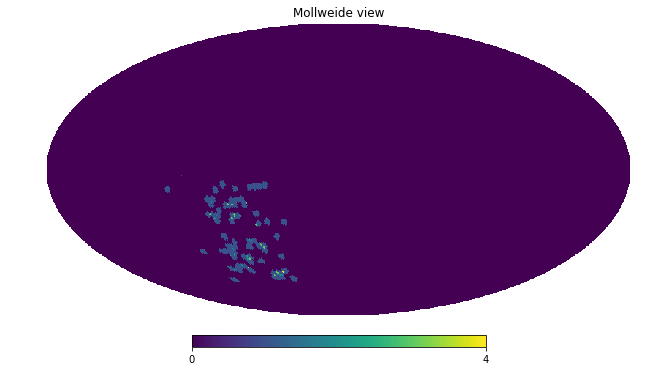

In [7]:
hp.mollview(scheduler.surveys[1].basis_functions[3].survey_features['Pair_in_night'].feature)

In [8]:
observations['night']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [9]:
observatory.mjd

array([ 59582.23584897])

In [10]:
observations['mjd']

array([ 59580.03819444,  59580.03916298,  59580.03985093,  59580.04055908,
        59580.04208887,  59580.04380562,  59580.04508669,  59580.04590362,
        59580.0475583 ,  59580.04832292,  59580.04949126,  59580.05034943,
        59580.05193949,  59580.05293361,  59580.05436308,  59580.05523968,
        59580.05650082,  59580.05795699,  59580.05913935,  59580.05983546,
        59580.06119497,  59580.06224582,  59580.06353387,  59580.06462247,
        59580.06575313,  59580.06630636,  59580.06701954,  59580.06773249,
        59580.06941957,  59580.07107482,  59580.07215954,  59580.07322107,
        59580.07461018,  59580.0758204 ,  59580.07753752,  59580.07905103,
        59580.07976302,  59580.08093827,  59580.08205389,  59580.08253077,
        59580.0834753 ,  59580.08520608,  59580.08589735,  59580.08735368,
        59580.08831409,  59580.08976159,  59580.09022089,  59580.09194989,
        59580.09334496,  59580.09382708,  59580.09520335,  59580.0968679 ,
        59580.09834282,  